# Lab 2: E-tivity 2: Data Preparation

**Student:** Egberto Linhares Leal

**Task 3**

Open a new Jupyter notebook and name it etivity2.ipynb. In your notebook, load bank.csv into a Pandas dataframe. Follow the examples and process in Lab 2 - Data Preparation.ipynb to prepare bank.csv for machine learning.

Ensure that you have:
* encoded all categorical attributes as numerical,
* filled in all missing values
* applied a scaler to rescale features
* treated outliers appropriately
* created at least one new feature from the existing ones.

In the end, save the prepared dataset as a CSV file on your hard disk.

## A. Importing required modules and dataset

In [1]:
# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('./bank.csv')

## B. Data Exploration

In [3]:
# Print first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
# Make a copy of the original data
df_original = df

## C. Encode categorical attributes

**Education:** we can convert education to number, so each education has a order (degree)

**Month:** we can convert month to number as we have an order for each month

In [6]:
# encode  education attribute
scale_mapper = { 
    "primary": 1, 
    "secondary": 2, 
    "tertiary": 3 
}
df['education'] = df['education'].replace(scale_mapper)

# encode month attribute 
scale_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}
df['month'] = df['month'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


## D. One-Hot Encode categorical attributes

In [7]:
# first one-hot encode the categorical columns with NaNs
df = pd.get_dummies(df, columns=['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'subscribed'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,housing_nan,loan_yes,loan_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan
1995,20.0,NaN,2785,16,9,327,2,-1,0,0,...,0,0,0,0,0,0,0,1,1,0
1996,28.0,2.0,127,16,9,1334,2,-1,0,0,...,0,0,0,0,0,0,0,1,1,0
1997,81.0,1.0,1154,17,9,231,1,-1,0,0,...,0,0,0,1,0,0,0,1,1,0
1998,46.0,1.0,4343,20,9,185,1,-1,0,0,...,0,0,0,0,1,0,0,1,1,0
1999,40.0,2.0,6403,22,9,208,2,-1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [8]:
# now one-hot encode all other categorical columns
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,housing_nan,loan_yes,loan_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan
0,32.0,3.0,392,1,4,957,2,131,2,0,...,0,0,0,0,0,0,0,0,0,0
1,39.0,2.0,688,1,4,233,2,133,1,0,...,0,1,0,0,0,0,0,0,0,0
2,59.0,2.0,1035,1,4,126,2,239,1,0,...,0,1,0,0,0,0,0,0,0,0
3,47.0,2.0,398,1,4,274,1,238,2,1,...,0,1,0,0,0,0,0,0,0,0
4,54.0,2.0,1004,1,4,479,1,307,1,0,...,0,0,0,0,0,0,0,0,0,0


Checking missing values

In [9]:
# Find the number of nulls/NaNs in the dataset
df.isna().sum()

age                   12
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
marital_married        0
marital_single         0
marital_nan            0
default_yes            0
default_nan            0
housing_yes            0
housing_nan            0
loan_yes               0
loan_nan               0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
subscribed_yes         0
subscribed_nan         0
dtype: int64

**Missing data:** age and education

## E. Fill in missing values

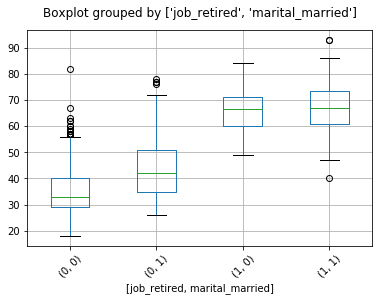

In [10]:
# boxplot for age
df.boxplot(column='age', by=['job_retired','marital_married'], rot=45)
plt.title("")
plt.show()

In [11]:
# we create a pivot table with median values for the groups.
ptable = df.pivot_table(values='age', 
                        index='job_retired',
                        columns= 'marital_married',  
                        aggfunc=np.median)
ptable

marital_married,0,1
job_retired,,
0,33.0,42.0
1,66.5,67.0


In [12]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['job_retired'], x['marital_married']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,housing_nan,loan_yes,loan_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,subscribed_yes,subscribed_nan
0,32.0,3.0,392,1,4,957,2,131,2,0,...,0,0,0,0,0,0,0,0,0,0
1,39.0,2.0,688,1,4,233,2,133,1,0,...,0,1,0,0,0,0,0,0,0,0
2,59.0,2.0,1035,1,4,126,2,239,1,0,...,0,1,0,0,0,0,0,0,0,0
3,47.0,2.0,398,1,4,274,1,238,2,1,...,0,1,0,0,0,0,0,0,0,0
4,54.0,2.0,1004,1,4,479,1,307,1,0,...,0,0,0,0,0,0,0,0,0,0


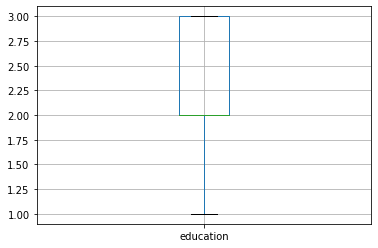

In [13]:
# Boxp plot of education
df.boxplot(column='education')
plt.show()

In [14]:
# fill in Education with median
df['education'].fillna(df['education'].median(), inplace=True)

In [15]:
# verify missing values again
df.isna().sum()

age                  0
education            0
balance              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
marital_married      0
marital_single       0
marital_nan          0
default_yes          0
default_nan          0
housing_yes          0
housing_nan          0
loan_yes             0
loan_nan             0
contact_telephone    0
contact_nan          0
poutcome_other       0
poutcome_success     0
poutcome_nan         0
subscribed_yes       0
subscribed_nan       0
dtype: int64

We don't have missing values anymore

## F. Rescale features

Rescale using **RobustScaler**

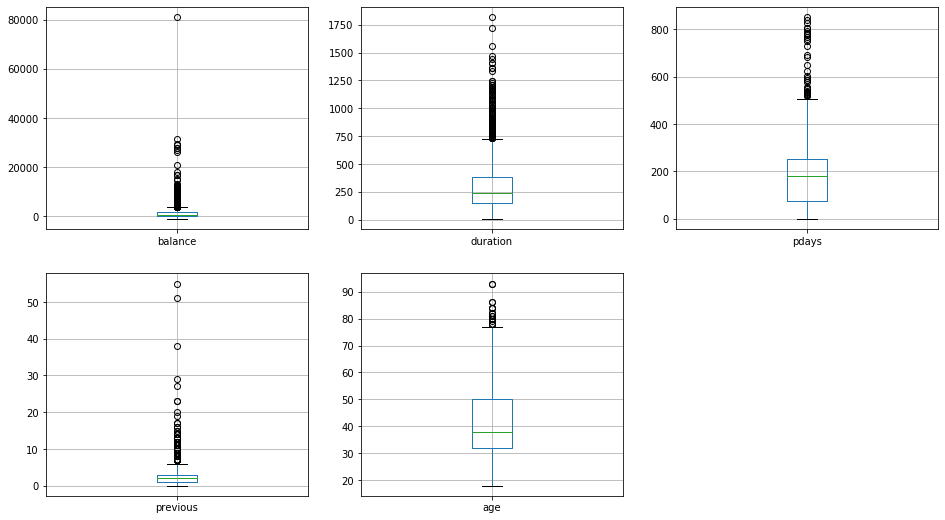

In [16]:
# Create figure with features before rescaling
fig = plt.figure(figsize=(16,9))

# Plot balance
plot_graph1 = fig.add_subplot(2, 3, 1)
df.boxplot(column=['balance'])

# Plot duration
plot_graph2 = fig.add_subplot(2, 3, 2)
df.boxplot(column=['duration'])

# Plot pdays
plot_graph3 = fig.add_subplot(2, 3, 3)
df.boxplot(column=['pdays'])

# Plot previous
plot_graph4 = fig.add_subplot(2, 3, 4)
df.boxplot(column=['previous'])

# Plot age
plot_graph5 = fig.add_subplot(2, 3, 5)
df.boxplot(column=['age'])

plt.show()

We should rescaling features

In [17]:
robust_scaler = RobustScaler()
df[['balance',
    'duration',
    'pdays',
    'previous',
    'age']] = robust_scaler.fit_transform(df[['balance',
                                              'duration',
                                              'pdays',
                                              'previous',
                                              'age']])

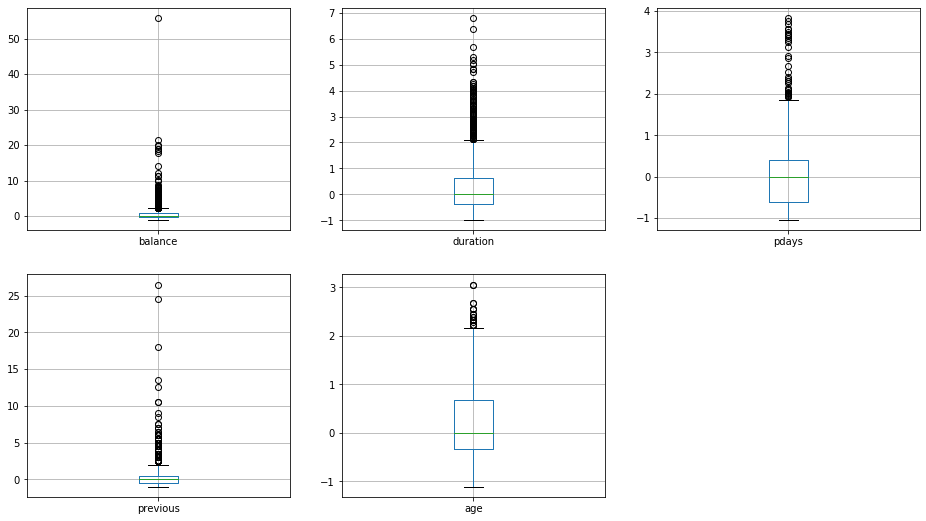

In [18]:
# Create figure with features after rescaling
fig = plt.figure(figsize=(16,9))

# Plot balance
plot_graph1 = fig.add_subplot(2, 3, 1)
df.boxplot(column=['balance'])

# Plot duration
plot_graph2 = fig.add_subplot(2, 3, 2)
df.boxplot(column=['duration'])

# Plot pdays
plot_graph3 = fig.add_subplot(2, 3, 3)
df.boxplot(column=['pdays'])

# Plot previous
plot_graph4 = fig.add_subplot(2, 3, 4)
df.boxplot(column=['previous'])

# Plot age
plot_graph5 = fig.add_subplot(2, 3, 5)
df.boxplot(column=['age'])

plt.show()


Bring values to interval [0,1]

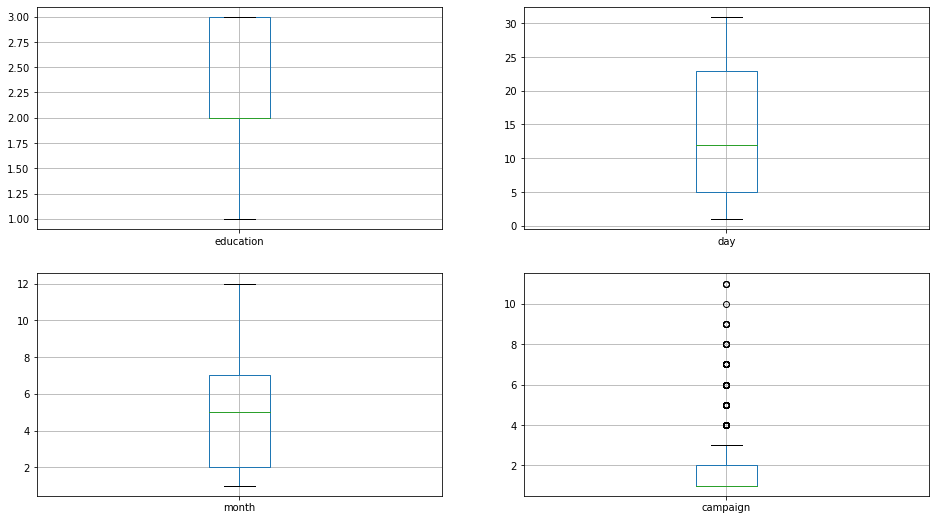

In [19]:
# Create figure with features before rescaling
fig = plt.figure(figsize=(16,9))

# Plot education
plot_graph1 = fig.add_subplot(2, 2, 1)
df.boxplot(column=['education'])

# Plot day
plot_graph2 = fig.add_subplot(2, 2, 2)
df.boxplot(column=['day'])

# Plot month
plot_graph3 = fig.add_subplot(2, 2, 3)
df.boxplot(column=['month'])

# Plot campaign
plot_graph4 = fig.add_subplot(2, 2, 4)
df.boxplot(column=['campaign'])

plt.show()

In [20]:
# Bring attributes to interval [0,1]

df['education'] = df['education']/len(df['education'].value_counts())
df['day'] = df['day']/len(df['day'].value_counts())
df['month'] = df['month']/len(df['month'].value_counts())
df['campaign'] = df['campaign']/len(df['campaign'].value_counts())

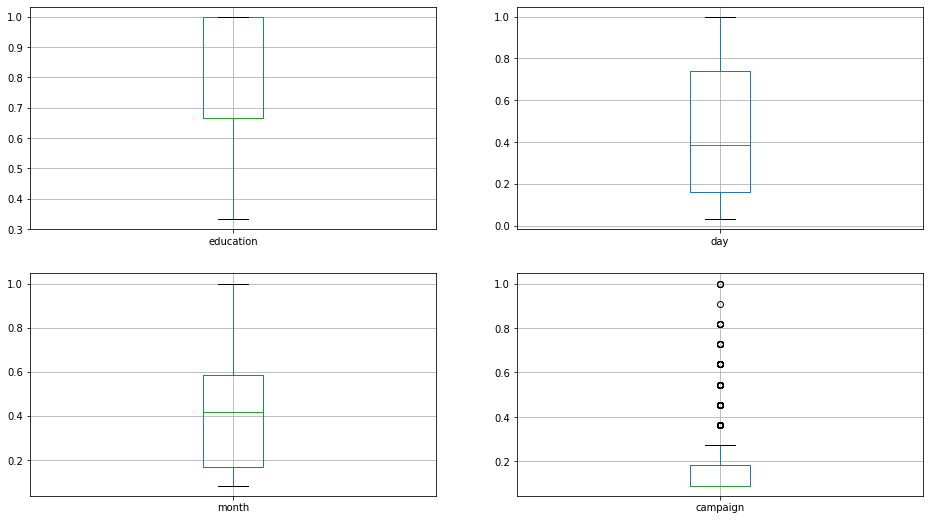

In [21]:
# Create figure with features after rescaling
fig = plt.figure(figsize=(16,9))

# Plot education
plot_graph1 = fig.add_subplot(2, 2, 1)
df.boxplot(column=['education'])

# Plot day
plot_graph2 = fig.add_subplot(2, 2, 2)
df.boxplot(column=['day'])

# Plot month
plot_graph3 = fig.add_subplot(2, 2, 3)
df.boxplot(column=['month'])

# Plot campaign
plot_graph4 = fig.add_subplot(2, 2, 4)
df.boxplot(column=['campaign'])

plt.show()

## G. Outliers

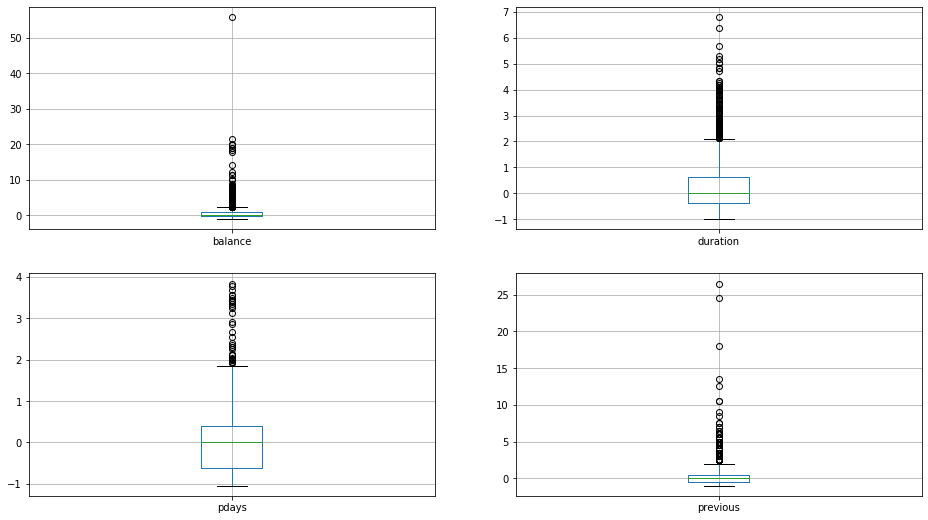

In [22]:
# Create figure with features before treatment
fig = plt.figure(figsize=(16,9))

# Plot balance
plot_graph1 = fig.add_subplot(2, 2, 1)
df.boxplot(column=['balance'])

# Plot duration
plot_graph2 = fig.add_subplot(2, 2, 2)
df.boxplot(column=['duration'])

# Plot pdays
plot_graph3 = fig.add_subplot(2, 2, 3)
df.boxplot(column=['pdays'])

# Plot previous
plot_graph4 = fig.add_subplot(2, 2, 4)
df.boxplot(column=['previous'])

plt.show()

In [23]:
# First, get the min values
df[['balance', 'duration', 'pdays', 'previous']].min()

balance    -1.060984
duration   -0.982833
pdays      -1.044223
previous   -1.000000
dtype: float64

In [24]:
# Use a log transformation to decrease the impact of outliers Adding min value +1 for negative attributes
df['balance'] = np.log(df['balance']+(df['balance'].min()*-1) + 1)
df['duration'] = np.log(df['duration']+(df['duration'].min()*-1) + 1)
df['pdays'] = np.log(df['pdays']+(df['pdays'].min()*-1) + 1)
df['previous'] = np.log(df['previous']+(df['previous'].min()*-1) + 1)

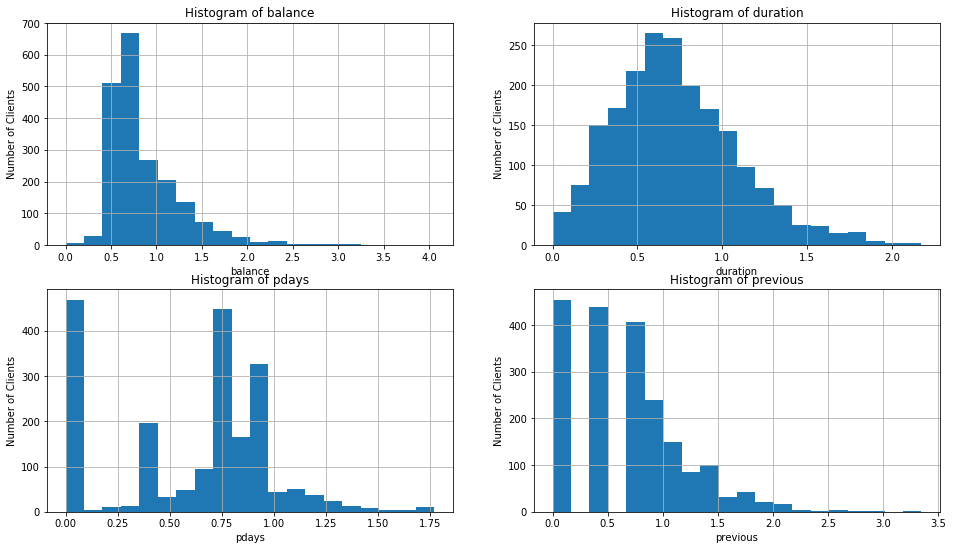

In [25]:
# histograms with rescaled values
fig = plt.figure(figsize=(16,9))

# Plot balance
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of Clients')
df['balance'].hist(bins=20)

# Plot duration
ax3 = fig.add_subplot(2, 2, 2)
ax3.set_title("Histogram of duration")
ax3.set_xlabel('duration')
ax3.set_ylabel('Number of Clients')
df['duration'].hist(bins=20)

# Plot pdays
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title("Histogram of pdays")
ax3.set_xlabel('pdays')
ax3.set_ylabel('Number of Clients')
df['pdays'].hist(bins=20)

# Plot previous
ax3 = fig.add_subplot(2, 2, 4)
ax3.set_title("Histogram of previous")
ax3.set_xlabel('previous')
ax3.set_ylabel('Number of Clients')
df['previous'].hist(bins=20)

plt.show()

## G. New Derived Feature

One good feature would be a indicator if client was in the last campaign or not: **attended_last_campaign**

Considering that if pdays greater than 0 **attended_last_campaign** should be YES (value equal 1)

In [26]:
df['pdays'].value_counts()

0.000000    454
0.715018     68
0.712222     62
0.425706     51
0.421971     41
           ... 
1.241079      1
1.759627      1
0.108067      1
1.336951      1
1.376619      1
Name: pdays, Length: 363, dtype: int64

In [27]:
# attended_last_campaign equal 1 if pdays greater than 0
df['attended_last_campaign'] = np.where(df['pdays'] > 0, 1, 0)

In [28]:
df['attended_last_campaign'].value_counts()

1    1546
0     454
Name: attended_last_campaign, dtype: int64

## G. Save prepared dataset

In [29]:
df.to_csv('bank_prepared.csv')